In [ ]:
# Mounting the Google drive containing all the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#defining the directory
base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'

In [ ]:
#Importing the necessary modules
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os

## PART 1: IMAGE SEGMENTATION

**PREPROCESSING**

The first step is to give the images uniform names. This is followed by resizing to a new dimension of of 512 x 512. Histogram equalization is a technique used to enhance the
contrast and brightness of an image by modifying its pixel
intensities. It works by redistributing the pixel intensities of
an image to obtain a uniform histogram, where all the possible
intensity values are equally distributed across the entire range
of values. It was applied to normalize the intensity
distribution of the images and to improve the contrast between
the lung tissue and the background. Finally, Gaussion Blur was applied to reduce noise and smooth the image

In [ ]:
def process_images(source_folder, destination_folder, new_prefix, target_size=(512, 512), kernel_size=(5, 5)):
    if not os.path.exists(destination_folder):
        print(f"Creating directory: {destination_folder}")
        os.mkdir(destination_folder)

    file_list = os.listdir(source_folder)
    image_files = [file for file in file_list if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    image_files.sort()

    for i, image_name in enumerate(image_files, start=1):
        image_path = os.path.join(source_folder, image_name)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Perform histogram equalization
        equalized_image = cv2.equalizeHist(original_image)

        # Resize the image
        resized_image = cv2.resize(equalized_image, target_size)

        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(resized_image, kernel_size, 0)

        # Save the processed image to the destination folder
        new_name = f"{new_prefix}{i}.png"  # Change the extension if needed
        processed_image_path = os.path.join(destination_folder, new_name)
        cv2.imwrite(processed_image_path, blurred_image)

        print(f"Processed {image_name} and saved to {processed_image_path}")

# Process different categories

categories = [
    (os.path.join(base_directory, 'Original_data', 'test', 'adenocarcinoma'), os.path.join(base_directory, 'preprocessed_data', 'test', 'adc'), 'adc'),
    (os.path.join(base_directory, 'Original_data', 'test', 'large.cell.carcinoma'),  os.path.join(base_directory, 'preprocessed_data', 'test', 'lcc'), 'lcc'),
    (os.path.join(base_directory, 'Original_data', 'test', 'squamous.cell.carcinoma'),  os.path.join(base_directory, 'preprocessed_data', 'test', 'scc'), 'scc'),
    (os.path.join(base_directory, 'Original_data', 'test', 'normal'),  os.path.join(base_directory, 'preprocessed_data', 'test', 'nml'), 'nml'),

    (os.path.join(base_directory, 'Original_data','train', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'),  os.path.join(base_directory, 'preprocessed_data', 'train', 'adc'), 'adc'),
    (os.path.join(base_directory, 'Original_data', 'train', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'),  os.path.join(base_directory, 'preprocessed_data', 'train', 'lcc'),'lcc'),
    (os.path.join(base_directory, 'Original_data', 'train', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'),  os.path.join(base_directory, 'preprocessed_data', 'train', 'scc'), 'scc'),
    (os.path.join(base_directory, 'Original_data', 'train', 'normal'),  os.path.join(base_directory, 'preprocessed_data', 'train', 'nml'),'nml'),

    (os.path.join(base_directory, 'Original_data', 'valid', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'), os.path.join(base_directory, 'preprocessed_data', 'valid', 'adc'),  'adc'),
    (os.path.join(base_directory, 'Original_data', 'valid', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'),  os.path.join(base_directory, 'preprocessed_data', 'valid', 'lcc'), 'lcc'),
    (os.path.join(base_directory, 'Original_data', 'valid', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'), os.path.join(base_directory, 'preprocessed_data', 'valid', 'scc'), 'scc'),
    (os.path.join(base_directory, 'Original_data', 'valid', 'normal'),  os.path.join(base_directory, 'preprocessed_data', 'valid', 'nml'), 'nml')

]


for source_folder, destination_folder, new_prefix in categories:
    os.makedirs(destination_folder, exist_ok=True)
    process_images(source_folder, destination_folder, new_prefix)


print("All operations done for all images.")



## Environment Set-up

In [ ]:
# when we are using google colab
using_colab = True

## Importing and Installing useful libraries for image processing
we import touch, torchvision and opencv-python matplotlib. We also install the segment-anything module and save it in a folder within the colab environment.

In [ ]:
if using_colab:
    import torch
    import torchvision
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4tzorzjx
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4tzorzjx
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=c36140c5840b378ec46c183f4986ebb3492b27c24198008f98e2cdfa4cd97255
  Stored in directory: /tmp/pip-ephem-wheel-cache-n57vogzy/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-09-27 16:46:00--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.111, 13.226.210.15, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.22

# Functions for displaying the annotated image from Automatic Segmentation

In [ ]:

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

# Functions for displaying points, boxes, and masks.
This is the helper function for displaying selected points, bounding boxes and masks when using the prompt-based segmentation technique

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

**This is the code to import SamPredictor, SamAutomaticMAskGenerator, sam_model_registry from the installed segment_anything. The device is also set to 'CUDA' to allow the use of GPU**

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

# Used to fine tune the model
# mask_generator = SamAutomaticMaskGenerator(
#      model=sam,
#      points_per_side=32,
#      pred_iou_thresh=0.9,
#      stability_score_thresh=0.96,
#      crop_n_layers=1,
#      crop_n_points_downscale_factor=2,
#      min_mask_region_area=100,
#  )

#Used to load the predictor model
predictor = SamPredictor(sam)

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

NameError: ignored

CODE TO PERFORM AUTOMATIC MASK GENERATION WITH SAM

In [ ]:
# Selecting the image and converting it to RGB image using the openCV function
base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'
file_path = os.path.join(base_directory, 'preprocessed_data','train','adc','adc5.png' )
image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

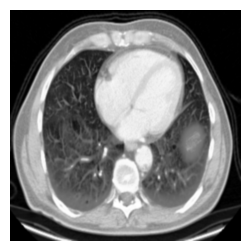

In [ ]:
# Displaying the selected image
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# code to set the image to the mask_generator in order to generate masks on the image
masks = mask_generator.generate(image)

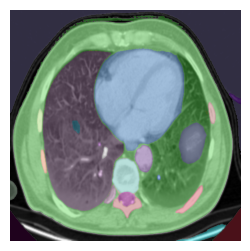

In [ ]:
# Displaying the images with the annotations (masks)
plt.figure(figsize=(3,3))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
# Code to see the datails of the masks
print(len(masks))
print(masks)

28
[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 190377, 'bbox': [7, 12, 485, 486], 'predicted_iou': 0.9997750520706177, 'point_coords': [[344.0, 440.0]], 'stability_score': 0.9581770896911621, 'crop_box': [0, 0, 512, 512]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]]), 'area': 1957, 'bbox': [0, 444, 59, 67], 'predicted_iou': 0.9907450079917908, '

In [ ]:
# Code to see the summary of the masks
iou_sum = 0
stability_sum = 0
highest_iou = float('-inf')
lowest_iou = float('inf')
highest_stability = float('-inf')
lowest_stability = float('inf')

# Calculate the average, highest, and lowest values
num_entries = len(masks)
for entry in masks:
    # Update sums for 'predicted_iou' and 'stability_score'
    iou_sum += entry['predicted_iou']
    stability_sum += entry['stability_score']

    # Update highest and lowest 'predicted_iou'
    if entry['predicted_iou'] > highest_iou:
        highest_iou = entry['predicted_iou']
    if entry['predicted_iou'] < lowest_iou:
        lowest_iou = entry['predicted_iou']

    # Update highest and lowest 'stability_score'
    if entry['stability_score'] > highest_stability:
        highest_stability = entry['stability_score']
    if entry['stability_score'] < lowest_stability:
        lowest_stability = entry['stability_score']

# Calculate the averages
average_iou = iou_sum / num_entries
average_stability = stability_sum / num_entries



# Print the results
print(f'number of masks: {len(masks)}')
print(f'Average Predicted IoU: {average_iou:.2f}')
print(f'Highest Predicted IoU: {highest_iou:.2f}')
print(f'Lowest Predicted IoU: {lowest_iou:.2f}')
print(f'Average Stability Score: {average_stability:.2f}')
print(f'Highest Stability Score: {highest_stability:.2f}')
print(f'Lowest Stability Score: {lowest_stability:.2f}')

number of masks: 28
Average Predicted IoU: 0.96
Highest Predicted IoU: 1.00
Lowest Predicted IoU: 0.89
Average Stability Score: 0.97
Highest Stability Score: 1.00
Lowest Stability Score: 0.95


**Below is the code to perform automatic segmentation on all the images in the preprocessed directory and save them in a automatic_segmented_data directory**

In [ ]:
# List of input and output directory paths
input_directories = [
    os.path.join(base_directory, 'preprocessed_data', 'test', 'adc'),
    os.path.join(base_directory, 'preprocessed_data', 'test', 'lcc'),
    os.path.join(base_directory, 'preprocessed_data', 'test', 'scc'),
    os.path.join(base_directory, 'preprocessed_data', 'test', 'nml'),

    os.path.join(base_directory, 'preprocessed_data', 'train', 'adc'),
    os.path.join(base_directory, 'preprocessed_data', 'train', 'lcc'),
    os.path.join(base_directory, 'preprocessed_data', 'train', 'scc'),
    os.path.join(base_directory, 'preprocessed_data', 'train', 'nml'),

    os.path.join(base_directory, 'preprocessed_data', 'valid', 'adc'),
    os.path.join(base_directory, 'preprocessed_data', 'valid', 'lcc'),
    os.path.join(base_directory, 'preprocessed_data', 'valid', 'scc'),
    os.path.join(base_directory, 'preprocessed_data', 'valid', 'nml')
]
output_directories = [
    os.path.join(base_directory, 'automatic_segmented_data', 'test', 'adc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'test', 'lcc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'test', 'scc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'test', 'nml'),

    os.path.join(base_directory, 'automatic_segmented_data', 'train', 'adc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'train', 'lcc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'train', 'scc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'train', 'nml'),

    os.path.join(base_directory, 'automatic_segmented_data', 'valid', 'adc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'valid', 'lcc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'valid', 'scc'),
    os.path.join(base_directory, 'automatic_segmented_data', 'valid', 'nml')
]

# Processing images from different input directories
for input_dir, output_dir in zip(input_directories, output_directories):
    # code to Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Processing each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            masks = mask_generator.generate(image)

            # Displaying and saving the segmented image
            plt.figure(figsize=(5, 5))
            plt.imshow(image)
            show_anns(masks)
            plt.axis('off')

            output_filename = os.path.join(output_dir, filename)
            plt.savefig(output_filename)
            plt.close()

print("Segmentation and saving done for all images.")


# Prompt based segmentation

## Creating an image embedding
Here, we create an image embedding by using the 'predictor.set_image()' and setting the image as the argument. Once this is done, the model will always remember this image and allow us to set any prompt on it.

In [ ]:
predictor.set_image(image)

**(1) Performing a single object with point selection and background selection**

In [ ]:
# we are selecting a point where x-axis is 200 and y-axis is 300 and choosing the foreground by setting input_label to 1
input_point = np.array([[200, 300]])
input_label = np.array([1])

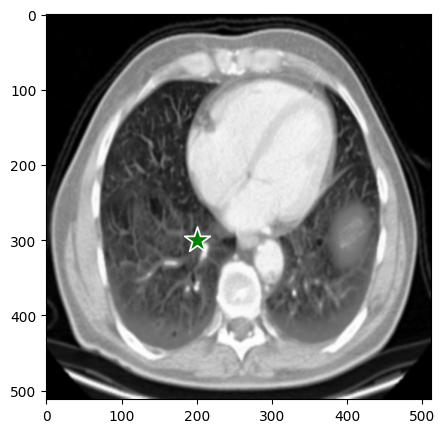

In [ ]:
# Displaying the image with the prompt (green star)
plt.figure(figsize=(5,5))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
# We now use predictor.predict() function to predict the masks and the scores
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

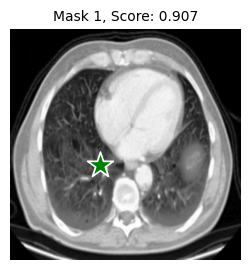

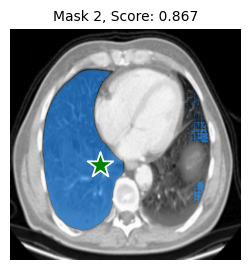

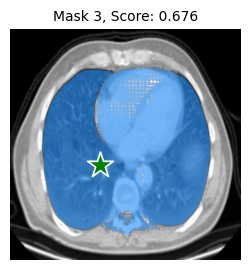

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(3,3))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=10)
    plt.axis('off')
    plt.show()

**(2) Specifying a specific object with additional points**




In [ ]:
#we specify two points corresponding to the lung region
input_point = np.array([[170, 300], [400, 300]])
input_label = np.array([1, 1])

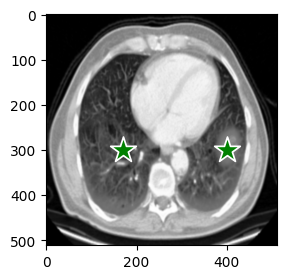

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # mask_input=mask_input[None, :, :],
    multimask_output=False,
)

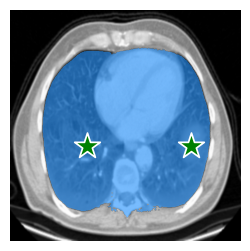

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

**(3) Specifying a specific object with a box**

In [ ]:
input_box = np.array([60, 80, 450, 440])

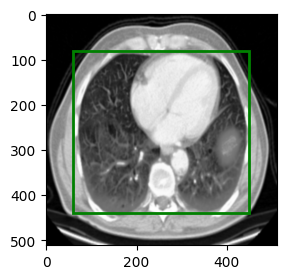

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(image)
show_box(input_box, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=True,)

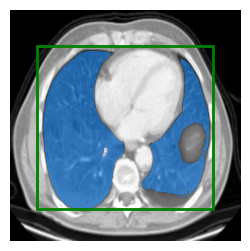

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

**(4) Combining points and Boxes**

In [ ]:
input_box = np.array([60, 80, 450, 440])
input_point = np.array([[270, 230]])
input_label = np.array([0])

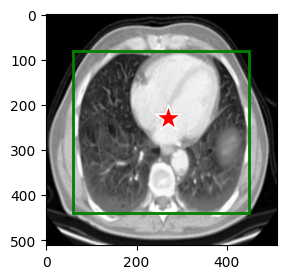

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(image)
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,)



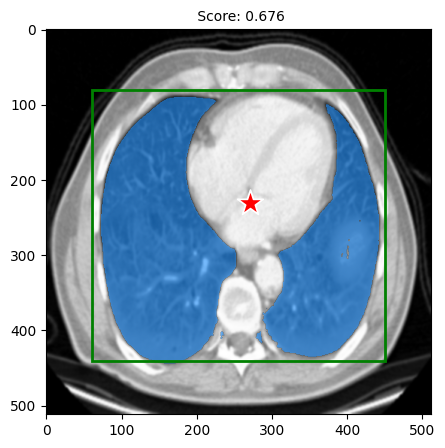

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.title(f" Score: {score:.3f}", fontsize=10)
plt.axis('on')
plt.show()

#**Extracting out the predicted masks**

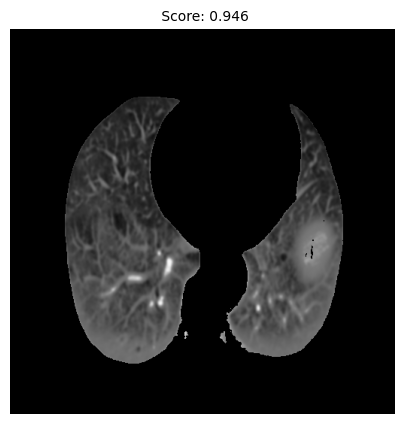

In [ ]:
# Extracting out the mask
for i, (mask, score) in enumerate(zip(masks, scores)):
    # Create a copy of the original image
    image_copy = image.copy()

    # Apply the mask to the image
    mask = mask.astype(bool)
    masked_part = image_copy * mask[:, :, np.newaxis]

    canvas = np.ones_like(image_copy) * 255
    canvas[mask] = masked_part[mask]

    # Display the masked part of the image
    plt.figure(figsize=(5, 5))

    plt.imshow(masked_part)
    # plt.imshow(canvas)
    plt.title(f" Score: {score:.3f}", fontsize=10)

    plt.axis('off')
    plt.show()

## PART 2: IMAGE CLASSIFICATION

PERFROMING CLASSIFICATION USING CNN AND VGG6 MODEL

## TRAINING WITH INTERFACE-BASED SEGMENTED LUNG DATA

In [ ]:
# Importing useful modules
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import (
    BatchNormalization,
    MaxPooling2D,
    Dropout,
    Flatten,
    Dense,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau,
)

In [ ]:
# Defining Directory paths
base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'
train_folder = os.path.join(base_directory, "web_segmented_lung", "train")
validate_folder = os.path.join(base_directory, "web_segmented_lung", "valid")
test_folder = os.path.join(base_directory, "web_segmented_lung", "test")


In [ ]:
# # Directory paths
# base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'
# train_folder = os.path.join(base_directory, "prompt_segmented_lung", "train")
# validate_folder = os.path.join(base_directory, "prompt_segmented_lung", "valid")
# test_folder = os.path.join(base_directory, "prompt_segmented_lung", "test")

In [ ]:
# Defining data parameters
input_shape = (224, 224, 3)
num_class = 4
batch_size = 32
epochs = 50

In [ ]:
# Data augmentation and preprocessing
datagen_params = {
    "dtype": "float32",
    "preprocessing_function": preprocess_input,
    "rotation_range": 10,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "shear_range": 0.2,
    "zoom_range": 0.2,
    "horizontal_flip": True,
    "vertical_flip": False,
}

train_datagen = ImageDataGenerator(**datagen_params)
val_datagen = ImageDataGenerator(**datagen_params)
test_datagen = ImageDataGenerator(**datagen_params)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

validation_generator = val_datagen.flow_from_directory(
    validate_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
# Loading the pre-trained VGG16 model
modelVGG16 = VGG16(
    weights="imagenet", include_top=False, input_shape=input_shape
)

# Freezing the VGG16 layers to avoid retraining
for layer in modelVGG16.layers:
    layer.trainable = False

# Building custom model on top of VGG16
model = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(num_class, activation="softmax"),
])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:

# Defining callbacks
callbacks = [
    ModelCheckpoint(
        filepath="C_CT_S.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        verbose=1,
    ),
    EarlyStopping(
        monitor="val_accuracy",
        min_delta=0.5,
        patience=5,
        restore_best_weights=True,
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=3,
        verbose=1,
        min_delta=0.8,
    ),
]

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
)

# Evaluating the model on the test data
score = model.evaluate(test_generator, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/50
20/20 [==============================] - 200s 9s/step - loss: 2.2509 - accuracy: 0.4095 - val_loss: 1.7705 - val_accuracy: 0.4583
Epoch 2/50
20/20 [==============================] - 13s 650ms/step - loss: 1.4349 - accuracy: 0.4649 - val_loss: 0.9420 - val_accuracy: 0.5833
Epoch 3/50
20/20 [==============================] - 13s 650ms/step - loss: 1.2047 - accuracy: 0.5139 - val_loss: 1.2087 - val_accuracy: 0.5278
Epoch 4/50
20/20 [==============================] - 13s 649ms/step - loss: 1.1165 - accuracy: 0.5302 - val_loss: 0.8623 - val_accuracy: 0.5556
Epoch 5/50
20/20 [==============================] - 13s 647ms/step - loss: 0.9387 - accuracy: 0.5661 - val_loss: 0.7936 - val_accuracy: 0.6250
Epoch 6/50
20/20 [==============================] - 13s 646ms/step - loss: 0.8587 - accuracy: 0.6003 - val_loss: 0.7850 - val_accuracy: 0.6250
Epoch 7/50
20/20 [==============================] - 13s 647ms/step - loss: 0.9008 - accuracy: 0.5971 - val_loss: 0.7123 - val_accuracy: 0.6806
E

## PERFORMANCE ANALYSIS

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# Make predictions on the test data using the generator
predictions_prob = model.predict(test_generator)

# Convert probability predictions to class labels
predictions = np.argmax(predictions_prob, axis=1)

# Get the true class labels from the test generator
true_label = test_generator.classes

# Generate a classification report
report = classification_report(true_label, predictions)

# Print the classification report
print(report)

10/10 [==============================] - 7s 596ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       120
           1       0.93      0.93      0.93        90
           2       1.00      1.00      1.00        54
           3       0.89      0.94      0.91        51

    accuracy                           0.93       315
   macro avg       0.94      0.94      0.94       315
weighted avg       0.93      0.93      0.93       315



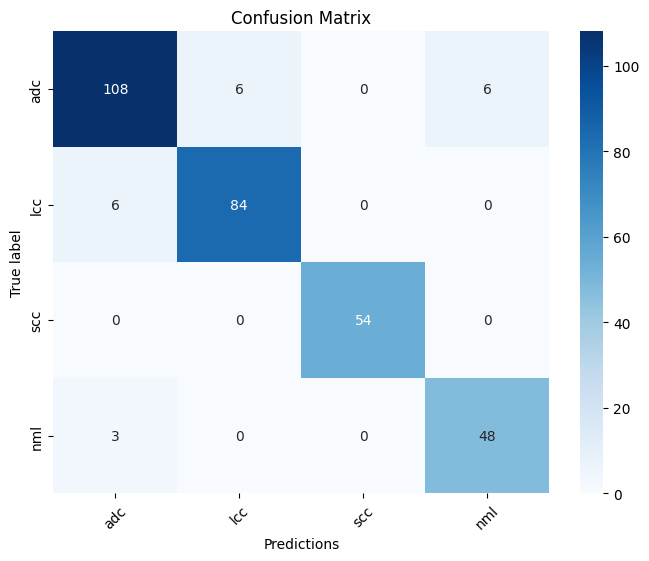

In [ ]:
# Calculate the confusion matrix
conf_mat = confusion_matrix(true_label, predictions)

# Define the class names (replace with your class names)
test_classes = ["adc", "lcc", "scc", "nml"]

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, fmt='g', annot=True, cmap='Blues',
            xticklabels=test_classes, yticklabels=test_classes)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
conf_mat = confusion_matrix(true_label, predictions)

# Get the number of classes (assuming it's a multi-class problem)
num_classes = len(conf_mat)

# Initialize variables to store metrics for each class
tn_per_class = []
tp_per_class = []
fp_per_class = []
fn_per_class = []

# Calculate metrics for each class
for class_label in range(num_classes):
    # True negatives are the sum of values outside the current row and column
    tn = np.sum(np.delete(np.delete(conf_mat, class_label, axis=0), class_label, axis=1))

    # True positives are the value on the diagonal (current class)
    tp = conf_mat[class_label, class_label]

    # False positives are the sum of values in the current column (excluding the true positives)
    fp = np.sum(conf_mat[:, class_label]) - tp

    # False negatives are the sum of values in the current row (excluding the true positives)
    fn = np.sum(conf_mat[class_label, :]) - tp

    # Append metrics to the respective lists
    tn_per_class.append(tn)
    tp_per_class.append(tp)
    fp_per_class.append(fp)
    fn_per_class.append(fn)

# Print metrics for each class
for class_label in range(num_classes):
    print(f"Class {class_label}:")
    print(f"True Negatives (TN): {tn_per_class[class_label]}")
    print(f"True Positives (TP): {tp_per_class[class_label]}")
    print(f"False Positives (FP): {fp_per_class[class_label]}")
    print(f"False Negatives (FN): {fn_per_class[class_label]}")
    print()


Class 0:
True Negatives (TN): 186
True Positives (TP): 108
False Positives (FP): 9
False Negatives (FN): 12

Class 1:
True Negatives (TN): 219
True Positives (TP): 84
False Positives (FP): 6
False Negatives (FN): 6

Class 2:
True Negatives (TN): 261
True Positives (TP): 54
False Positives (FP): 0
False Negatives (FN): 0

Class 3:
True Negatives (TN): 258
True Positives (TP): 48
False Positives (FP): 6
False Negatives (FN): 3



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class labels
class_labels = ['adc', 'lcc', 'scc', 'nml']

# Calculate the confusion matrix
conf_mat = confusion_matrix(true_label, predictions)

# Get the number of classes (assuming it's a multi-class problem)
num_classes = len(conf_mat)

# Initialize variables to store metrics for each class
accuracy_per_class = []
sensitivity_per_class = []
precision_per_class = []
specificity_per_class = []

# Calculate metrics for each class
for class_index in range(num_classes):
    # True positives are the value on the diagonal (current class)
    tp = conf_mat[class_index, class_index]

    # False positives are the sum of values in the current column (excluding the true positives)
    fp = np.sum(conf_mat[:, class_index]) - tp

    # False negatives are the sum of values in the current row (excluding the true positives)
    fn = np.sum(conf_mat[class_index, :]) - tp

    # True negatives are the sum of values outside the current row and column
    tn = np.sum(np.delete(np.delete(conf_mat, class_index, axis=0), class_index, axis=1))

    # Calculate accuracy for the current class
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate sensitivity (recall) for the current class
    sensitivity = tp / (tp + fn)

    # Calculate precision for the current class
    precision = tp / (tp + fp)

    # Calculate specificity for the current class
    specificity = tn / (tn + fp)

    # Append metrics to the respective lists, rounded to 2 decimal places
    accuracy_per_class.append(round(accuracy, 2))
    sensitivity_per_class.append(round(sensitivity, 2))
    precision_per_class.append(round(precision, 2))
    specificity_per_class.append(round(specificity, 2))

# Print metrics for each class
for class_index in range(num_classes):
    class_label = class_labels[class_index]
    print(f"Class {class_label}:")
    print(f"Accuracy: {accuracy_per_class[class_index]}")
    print(f"Sensitivity (Recall): {sensitivity_per_class[class_index]}")
    print(f"Precision: {precision_per_class[class_index]}")
    print(f"Specificity: {specificity_per_class[class_index]}")
    print()


Class adc:
Accuracy: 0.93
Sensitivity (Recall): 0.9
Precision: 0.92
Specificity: 0.95

Class lcc:
Accuracy: 0.96
Sensitivity (Recall): 0.93
Precision: 0.93
Specificity: 0.97

Class scc:
Accuracy: 1.0
Sensitivity (Recall): 1.0
Precision: 1.0
Specificity: 1.0

Class nml:
Accuracy: 0.97
Sensitivity (Recall): 0.94
Precision: 0.89
Specificity: 0.98



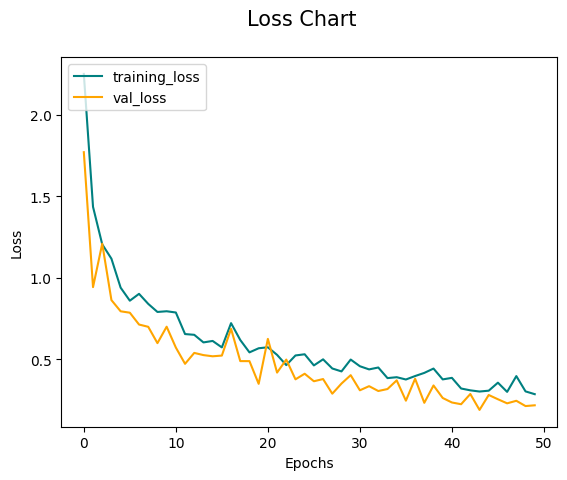

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='training_loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss Chart', fontsize=15)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

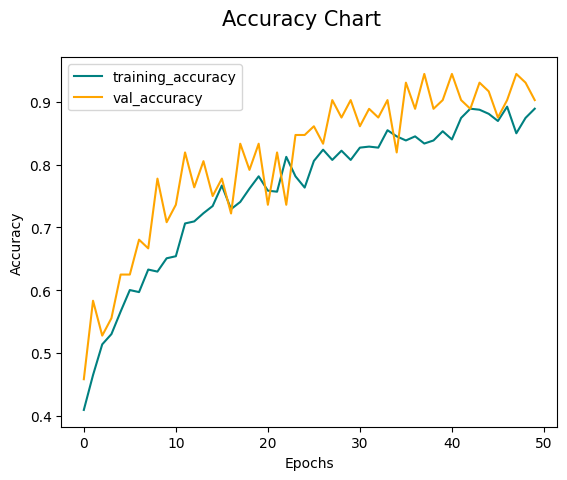

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy Chart', fontsize=15)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

1/1 [==============================] - 0s 36ms/step


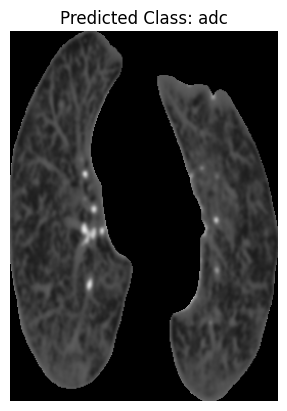

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image for testing (replace 'image_path.jpg' with the path to your image)
image_path = os.path.join(base_directory, "web_segmented_lung", "test", "adc", "adc32.png") # Replace with the path to your image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Preprocess the image using the same preprocessing function as in your data generators
img = preprocess_input(img)

# Make a prediction using your model
prediction_prob = model.predict(img)
predicted_class = np.argmax(prediction_prob, axis=1)

# Get the class name corresponding to the predicted class (replace with your class names)
class_names = ["adc", "lcc", "scc", "nml"]  # Replace with your actual class names
predicted_class_name = class_names[predicted_class[0]]

# Display the image and the predicted class
plt.imshow(image.load_img(image_path))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()

## Save the model

In [ ]:
# Define the file path where you want to save the model in the base directory
model_save_path = os.path.join(base_directory, 'model.h5')

# Save the model to the specified file path
model.save(model_save_path)

# Print a message to confirm that the model has been saved
print(f"Model saved to {model_save_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Colab Notebooks/project_data/model.h5


## TRAINING WITH THE ORIGINAL DATA

In [ ]:
# Defining Directory paths
base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'
train_folder = os.path.join(base_directory, "Original_data", "train")
validate_folder = os.path.join(base_directory, "Original_data", "valid")
test_folder = os.path.join(base_directory, "Original_data", "test")


# Defining data parameters
input_shape = (224, 224, 3)
num_class = 4
batch_size = 32
epochs = 50

# Data augmentation and preprocessing
datagen_params = {
    "dtype": "float32",
    "preprocessing_function": preprocess_input,
    "rotation_range": 10,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "shear_range": 0.2,
    "zoom_range": 0.2,
    "horizontal_flip": True,
    "vertical_flip": False,
}

train_datagen = ImageDataGenerator(**datagen_params)
val_datagen = ImageDataGenerator(**datagen_params)
test_datagen = ImageDataGenerator(**datagen_params)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

validation_generator = val_datagen.flow_from_directory(
    validate_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

# Loading the pre-trained VGG16 model
modelVGG16 = VGG16(
    weights="imagenet", include_top=False, input_shape=input_shape
)

# Freezing the VGG16 layers to avoid retraining
for layer in modelVGG16.layers:
    layer.trainable = False

# Building custom model on top of VGG16
model = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(num_class, activation="softmax"),
])

# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Defining callbacks
callbacks = [
    ModelCheckpoint(
        filepath="C_CT_S.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        verbose=1,
    ),
    EarlyStopping(
        monitor="val_accuracy",
        min_delta=0.5,
        patience=5,
        restore_best_weights=True,
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=3,
        verbose=1,
        min_delta=0.8,
    ),
]

# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
)

# Evaluating the model on the test data
score = model.evaluate(test_generator, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
20/20 [==============================] - 379s 19s/step - loss: 2.0900 - accuracy: 0.4192 - val_loss: 1.9012 - val_accuracy: 0.4722
Epoch 2/50
20/20 [==============================] - 14s 684ms/step - loss: 1.2662 - accuracy: 0.5269 - val_loss: 1.1711 - val_accuracy: 0.5556
Epoch 3/50
20/20 [==============================] - 14s 688ms/step - loss: 1.0230 - accuracy: 0.5693 - val_loss: 0.9323 - val_accuracy: 0.5694
Epoch 4/50
20/20 [==============================] - 14s 686ms/step - loss: 0.9346 - accuracy: 0.6215 - val_loss: 1.2141 - val_accuracy: 0.4444
Epoch 5/50
20/20 [==============================] - 13s 670ms/step - loss: 0.8412 - accuracy: 0.6444 - val_loss: 0.7691 - val_accuracy: 0.6528
Epoch 6/50
20/20 [==============================] - 14s 674ms/step - loss: 0.7576 - accuracy: 0.688

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# Make predictions on the test data using the generator
predictions_prob = model.predict(test_generator)

# Convert probability predictions to class labels
predictions = np.argmax(predictions_prob, axis=1)

# Get the true class labels from the test generator
true_label = test_generator.classes

# Generate a classification report
report = classification_report(true_label, predictions)

# Print the classification report
print(report)

10/10 [==============================] - 6s 555ms/step
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       120
           1       0.54      0.96      0.70        51
           2       0.93      0.98      0.95        54
           3       0.80      0.68      0.73        90

    accuracy                           0.77       315
   macro avg       0.78      0.82      0.78       315
weighted avg       0.80      0.77      0.77       315



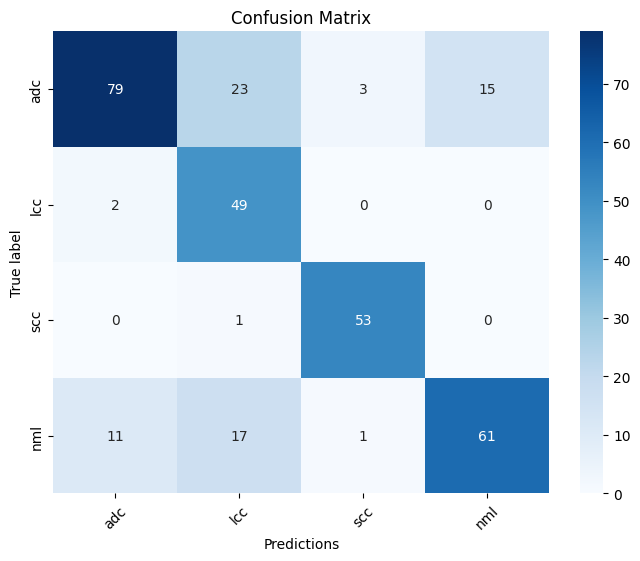

In [ ]:
# Calculate the confusion matrix
conf_mat = confusion_matrix(true_label, predictions)

# Define the class names (replace with your class names)
test_classes = ["adc", "lcc", "scc", "nml"]

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, fmt='g', annot=True, cmap='Blues',
            xticklabels=test_classes, yticklabels=test_classes)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

## TRAINING  WITH AUTOMATIC_SEGMENTED_DATA

In [ ]:
# Defining Directory paths
base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'
train_folder = os.path.join(base_directory, "automatic_segmented_data", "train")
validate_folder = os.path.join(base_directory, "automatic_segmented_data", "valid")
test_folder = os.path.join(base_directory, "automatic_segmented_data", "test")


# Defining data parameters
input_shape = (224, 224, 3)
num_class = 4
batch_size = 32
epochs = 50

# Data augmentation and preprocessing
datagen_params = {
    "dtype": "float32",
    "preprocessing_function": preprocess_input,
    "rotation_range": 10,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "shear_range": 0.2,
    "zoom_range": 0.2,
    "horizontal_flip": True,
    "vertical_flip": False,
}

train_datagen = ImageDataGenerator(**datagen_params)
val_datagen = ImageDataGenerator(**datagen_params)
test_datagen = ImageDataGenerator(**datagen_params)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

validation_generator = val_datagen.flow_from_directory(
    validate_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

# Loading the pre-trained VGG16 model
modelVGG16 = VGG16(
    weights="imagenet", include_top=False, input_shape=input_shape
)

# Freezing the VGG16 layers to avoid retraining
for layer in modelVGG16.layers:
    layer.trainable = False

# Building custom model on top of VGG16
model = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(num_class, activation="softmax"),
])

# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Defining callbacks
callbacks = [
    ModelCheckpoint(
        filepath="C_CT_S.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        verbose=1,
    ),
    EarlyStopping(
        monitor="val_accuracy",
        min_delta=0.5,
        patience=5,
        restore_best_weights=True,
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=3,
        verbose=1,
        min_delta=0.8,
    ),
]

# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
)

# Evaluating the model on the test data
score = model.evaluate(test_generator, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Epoch 1/50
20/20 [==============================] - 278s 14s/step - loss: 2.5915 - accuracy: 0.3507 - val_loss: 2.1695 - val_accuracy: 0.4306
Epoch 2/50
20/20 [==============================] - 17s 873ms/step - loss: 1.5306 - accuracy: 0.4372 - val_loss: 1.2080 - val_accuracy: 0.3889
Epoch 3/50
20/20 [==============================] - 17s 824ms/step - loss: 1.2086 - accuracy: 0.4976 - val_loss: 1.2254 - val_accuracy: 0.3889
Epoch 4/50
20/20 [==============================] - 18s 868ms/step - loss: 1.2426 - accuracy: 0.4976 - val_loss: 1.1843 - val_accuracy: 0.3889
Epoch 5/50
20/20 [==============================] - 16s 819ms/step - loss: 1.0943 - accuracy: 0.5237 - val_loss: 0.9727 - val_accuracy: 0.5694
Epoch 6/50
20/20 [==============================] - 18s 904ms/step - loss: 1.0164 - accuracy: 0.5481 - val_loss: 1.1676 - val_accuracy: 0.5000
Epoch 7/50
20/20 [===

## TRAINING WITH PROMPT_BASED_SEGMENED LUNG REGION

In [ ]:
# Defining Directory paths
base_directory = '/content/drive/MyDrive/Colab Notebooks/project_data'
train_folder = os.path.join(base_directory, "prompt_segmented_lung", "train")
validate_folder = os.path.join(base_directory, "prompt_segmented_lung", "valid")
test_folder = os.path.join(base_directory, "prompt_segmented_lung", "test")


# Defining data parameters
input_shape = (224, 224, 3)
num_class = 4
batch_size = 32
epochs = 50

# Data augmentation and preprocessing
datagen_params = {
    "dtype": "float32",
    "preprocessing_function": preprocess_input,
    "rotation_range": 10,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "shear_range": 0.2,
    "zoom_range": 0.2,
    "horizontal_flip": True,
    "vertical_flip": False,
}

train_datagen = ImageDataGenerator(**datagen_params)
val_datagen = ImageDataGenerator(**datagen_params)
test_datagen = ImageDataGenerator(**datagen_params)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

validation_generator = val_datagen.flow_from_directory(
    validate_folder,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
)

# Loading the pre-trained VGG16 model
modelVGG16 = VGG16(
    weights="imagenet", include_top=False, input_shape=input_shape
)

# Freezing the VGG16 layers to avoid retraining
for layer in modelVGG16.layers:
    layer.trainable = False

# Building custom model on top of VGG16
model = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation="relu"),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(num_class, activation="softmax"),
])

# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Defining callbacks
callbacks = [
    ModelCheckpoint(
        filepath="C_CT_S.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        verbose=1,
    ),
    EarlyStopping(
        monitor="val_accuracy",
        min_delta=0.5,
        patience=5,
        restore_best_weights=True,
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=3,
        verbose=1,
        min_delta=0.8,
    ),
]

# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1,
)

# Evaluating the model on the test data
score = model.evaluate(test_generator, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Epoch 1/50
20/20 [==============================] - 225s 11s/step - loss: 2.5333 - accuracy: 0.3670 - val_loss: 3.0007 - val_accuracy: 0.4028
Epoch 2/50
20/20 [==============================] - 13s 669ms/step - loss: 1.5786 - accuracy: 0.4780 - val_loss: 1.0397 - val_accuracy: 0.5556
Epoch 3/50
20/20 [==============================] - 13s 676ms/step - loss: 1.1246 - accuracy: 0.5481 - val_loss: 0.8832 - val_accuracy: 0.6111
Epoch 4/50
20/20 [==============================] - 13s 670ms/step - loss: 1.1116 - accuracy: 0.5726 - val_loss: 0.7148 - val_accuracy: 0.6944
Epoch 5/50
20/20 [==============================] - 14s 705ms/step - loss: 1.0103 - accuracy: 0.5905 - val_loss: 0.6738 - val_accuracy: 0.7222
Epoch 6/50
20/20 [==============================] - 13s 677ms/step - loss: 0.9618 - accuracy: 0.6036 - val_loss: 0.7225 - val_accuracy: 0.6667
Epoch 7/50
20/20 [===